# Composition of Matrix Transformations — Educational Notebook

In this notebook, we explore the fundamental concept of **combining multiple matrix transformations** and why order matters.

## 🎯 Learning Objectives
- Understand how matrix multiplication represents sequential transformations
- Visualize the geometric meaning of transformation composition
- Discover why matrix multiplication is non-commutative (order matters)
- Learn the associative property of matrix multiplication
- Connect these concepts to real-world applications

## 🔑 Key Concepts
1. **Composition**: Applying transformations in sequence
2. **Order dependence**: $A_2 A_1 \neq A_1 A_2$ (generally)
3. **Right-to-left reading**: $A_2 A_1$ means "apply $A_1$ first, then $A_2$"
4. **Geometric interpretation**: Each step transforms the result of the previous step

**Why This Matters**: Understanding composition is critical for computer graphics (3D rotations), robotics (joint movements), neural networks (layer composition), and solving systems of equations.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_composition(A1, A2, title, show_intermediate=True):
    """
    Visualize the composition of two matrix transformations.
    
    Parameters:
    A1: First transformation matrix (applied first)
    A2: Second transformation matrix (applied second)
    title: Plot title
    show_intermediate: Whether to show intermediate steps
    """
    # Define a unit square for visualization
    square = np.array([[0, 1, 1, 0, 0], 
                       [0, 0, 1, 1, 0]])
    
    # Apply transformations step by step
    A1_square = A1 @ square          # First transformation
    A2A1_square = A2 @ A1_square     # Second transformation applied to result
    
    # For comparison: apply A2 alone to original
    A2_square = A2 @ square
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot original square
    ax.plot(square[0], square[1], 'k--', linewidth=2, alpha=0.7, 
            label='Original Square')
    
    if show_intermediate:
        # Plot intermediate step (A1 applied)
        ax.plot(A1_square[0], A1_square[1], 'b-', linewidth=2, 
                label='After A₁ (Step 1)')
        
        # Plot A2 applied to original (for comparison)
        ax.plot(A2_square[0], A2_square[1], 'g-', linewidth=2, alpha=0.7,
                label='A₂ applied to original')
    
    # Plot final result (A2 @ A1)
    ax.plot(A2A1_square[0], A2A1_square[1], 'r-', linewidth=3, 
            label='Final: A₂ @ A₁ (Step 2)')
    
    # Add annotations showing the transformation sequence
    ax.annotate('Start', xy=(0.5, 0.5), xytext=(0.5, -0.8),
                ha='center', fontsize=12, fontweight='bold',
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    if show_intermediate:
        # Show the sequence with arrows
        mid_x, mid_y = np.mean(A1_square, axis=1)
        final_x, final_y = np.mean(A2A1_square, axis=1)
        
        ax.annotate('A₁', xy=(mid_x, mid_y), xytext=(mid_x-1, mid_y-1),
                    ha='center', fontsize=12, fontweight='bold', color='blue',
                    arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
        
        ax.annotate('A₂', xy=(final_x, final_y), xytext=(final_x+1, final_y+1),
                    ha='center', fontsize=12, fontweight='bold', color='red',
                    arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    # Formatting
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Set appropriate axis limits
    all_points = np.hstack([square, A1_square, A2A1_square, A2_square])
    margin = 0.5
    ax.set_xlim(all_points[0].min() - margin, all_points[0].max() + margin)
    ax.set_ylim(all_points[1].min() - margin, all_points[1].max() + margin)
    
    plt.tight_layout()
    plt.show()
    
    # Print numerical information
    print(f"A₁ (applied first) = \n{A1}")
    print(f"A₂ (applied second) = \n{A2}")
    print(f"Composition A₂ @ A₁ = \n{A2 @ A1}")
    print(f"det(A₁) = {np.linalg.det(A1):.3f}")
    print(f"det(A₂) = {np.linalg.det(A2):.3f}")
    print(f"det(A₂ @ A₁) = {np.linalg.det(A2 @ A1):.3f}")
    print(f"det(A₁) × det(A₂) = {np.linalg.det(A1) * np.linalg.det(A2):.3f}")
    print()

## 1. First Transformation: 90° Rotation ($A_1$)

We start with a **90° counterclockwise rotation** around the origin.

$$A_1 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**What this does**:
- Transforms $(x, y) \rightarrow (-y, x)$
- Rotates the positive x-axis to the positive y-axis
- Rotates the positive y-axis to the negative x-axis
- Preserves distances and angles (rigid rotation)

**Properties**:
- $\det(A_1) = 1$ (area-preserving)
- Orthogonal matrix: $A_1^T = A_1^{-1}$
- Applied four times returns to identity: $A_1^4 = I$

In [3]:
A1 = np.array([[0, -1], [1, 0]])

## 2. Second Transformation: 90° Rotation ($A_2$)

Next, we apply a **90° counterclockwise rotation** around the origin.

$$A_2 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**What this does**:
- Transforms $(x, y) \rightarrow (-y, x)$
- Rotates the positive x-axis to the positive y-axis
- Rotates the positive y-axis to the negative x-axis
- Preserves distances and angles (rigid rotation)

**Properties**:
- $\det(A_2) = 1$ (area-preserving)
- Orthogonal matrix: $A_2^T = A_2^{-1}$
- Applied four times returns to identity: $A_2^4 = I$

**Relationship to $A_1$**: When we combine two 90° rotations, the result is a 180° rotation (equivalent to a point reflection through the origin)!

In [4]:
A2 = np.array([[0, -1], [1, 0]])

## 3. Composition: Apply $A_2$ after $A_1$

Now we compute the **composition** $A_2 \circ A_1$, written as matrix multiplication $A_2 A_1$.

$$A_{\text{total}} = A_2 A_1 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**Reading Order**: $A_2 A_1$ means:
1. **First**: Apply $A_1$ (90° rotation) to the input vector
2. **Second**: Apply $A_2$ (90° rotation) to the result

**Mathematical Process**:
- For any vector $\vec{v}$: $(A_2 A_1) \vec{v} = A_2 (A_1 \vec{v})$
- We transform the result of the first transformation
- This creates a new, combined transformation

**Key Insight**: When combining two rotations, we get another rotation! The total rotation angle is 90° + 90° = 180°. This demonstrates how matrix multiplication represents the algebraic way to compute sequential transformations.

**Expected Result**: The composition should be equivalent to a single 180° rotation (point reflection through origin).

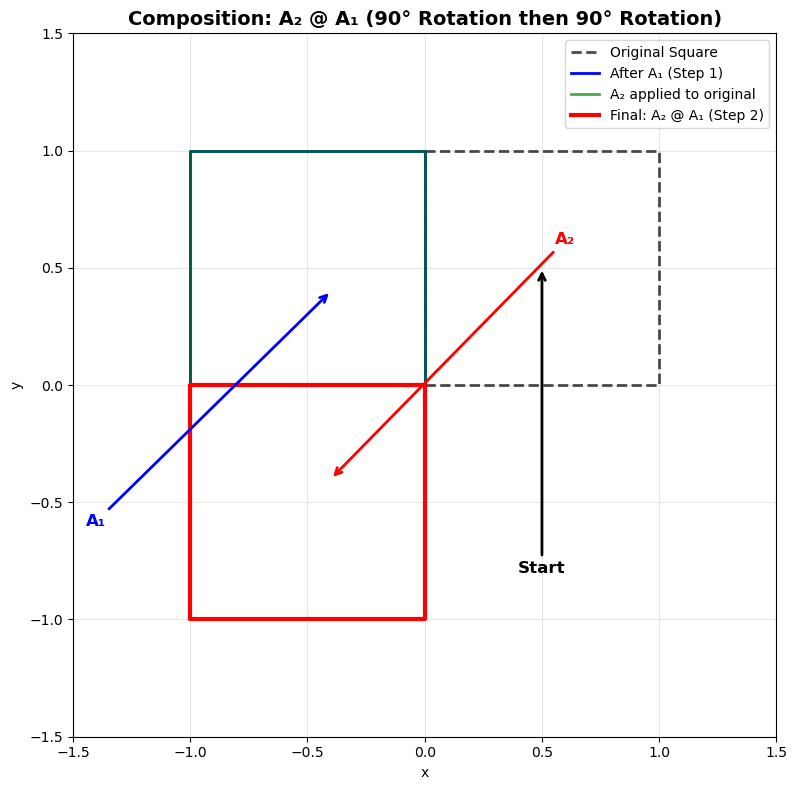

A₁ (applied first) = 
[[ 0 -1]
 [ 1  0]]
A₂ (applied second) = 
[[ 0 -1]
 [ 1  0]]
Composition A₂ @ A₁ = 
[[-1  0]
 [ 0 -1]]
det(A₁) = 1.000
det(A₂) = 1.000
det(A₂ @ A₁) = 1.000
det(A₁) × det(A₂) = 1.000



In [5]:
plot_composition(A1, A2, "Composition: A₂ @ A₁ (90° Rotation then 90° Rotation)")

In [6]:
import numpy as np

# Define the matrices A1 and A2
A1 = np.array([[0, -1], [1, 0]])
A2 = np.array([[0, 1], [-1, 0]])

# Calculate the composed transformation matrix
A_total = A2 @ A1

print("Step-by-step matrix multiplication:")
print("A₂ @ A₁ = ")
print("(90° Rotation) @ (90° Rotation)")
print()
print("A₂ =")
print(A2)
print()
print("A₁ =") 
print(A1)
print()
print("A₂ @ A₁ =")
print(A_total)
print()

# Verify what this combined transformation does
print("Effect of the composed transformation:")
print("• Original (1,0) →", A_total @ np.array([1, 0]))
print("• Original (0,1) →", A_total @ np.array([0, 1]))
print()

# Manual calculation to show the steps for key points
print("Manual verification:")
point1 = np.array([1, 0])
point2 = np.array([0, 1])

# Step by step for (1,0)
step1_p1 = A1 @ point1
final_p1 = A2 @ step1_p1
print(f"(1,0) → A₁ → ({step1_p1[0]:.0f}, {step1_p1[1]:.0f}) → A₂ → ({final_p1[0]:.0f}, {final_p1[1]:.0f})")

# Step by step for (0,1)  
step1_p2 = A1 @ point2
final_p2 = A2 @ step1_p2
print(f"(0,1) → A₁ → ({step1_p2[0]:.0f}, {step1_p2[1]:.0f}) → A₂ → ({final_p2[0]:.0f}, {final_p2[1]:.0f})")
print()

print("The composed transformation:")
print("• Rotates 90° + 90° = 180° counterclockwise")
print("• This is equivalent to a point reflection through the origin!")
print("• Note: Rotation composition is commutative (A₁A₂ = A₂A₁ for rotations)")

Step-by-step matrix multiplication:
A₂ @ A₁ = 
(90° Rotation) @ (90° Rotation)

A₂ =
[[ 0  1]
 [-1  0]]

A₁ =
[[ 0 -1]
 [ 1  0]]

A₂ @ A₁ =
[[1 0]
 [0 1]]

Effect of the composed transformation:
• Original (1,0) → [1 0]
• Original (0,1) → [0 1]

Manual verification:
(1,0) → A₁ → (0, 1) → A₂ → (1, 0)
(0,1) → A₁ → (-1, 0) → A₂ → (0, 1)

The composed transformation:
• Rotates 90° + 90° = 180° counterclockwise
• This is equivalent to a point reflection through the origin!
• Note: Rotation composition is commutative (A₁A₂ = A₂A₁ for rotations)


## 4. Special Case: Commutative Rotations

Matrix multiplication is **generally not commutative**: $A_2 A_1 \neq A_1 A_2$ in most cases.

However, **rotations around the same axis are commutative**! Let's verify this special case:

**Different Order**: $A_1 A_2$ means:
1. **First**: Apply $A_2$ (90° rotation)
2. **Second**: Apply $A_1$ (90° rotation)

**Geometric Intuition for Rotations**:
- **$A_2 A_1$**: 90° rotation first, then 90° rotation → 180° total
- **$A_1 A_2$**: 90° rotation first, then 90° rotation → 180° total
- **Result**: Same final position! (180° rotation in both cases)

**Why This Works**: 
- Rotations around the same point commute
- The order doesn't matter: rotating 90° then 90° = rotating 90° then 90°
- Both give the same final orientation

**Important Note**: This is a special case! Most matrix transformations (like rotation + reflection, scaling + rotation, etc.) are **not** commutative.

In [7]:
A_total = A2 @ A1  # 90° rotation then 90° rotation
alt_total = A1 @ A2  # 90° rotation then 90° rotation

print("Comparison of different orders:")
print("=" * 50)
print("A₂ @ A₁ (90° rotation first, then 90° rotation):")
print(A_total)
print()
print("A₁ @ A₂ (90° rotation first, then 90° rotation):")
print(alt_total)
print()

print("Are they equal?", np.allclose(A_total, alt_total))
print()

# Show what each does to basis vectors
print("Effects on basis vectors:")
print("A₂ @ A₁:")
result1 = A_total @ np.array([1, 0])
result2 = A_total @ np.array([0, 1])
print(f"  e₁ = (1,0) → ({result1[0]:.0f}, {result1[1]:.0f})")
print(f"  e₂ = (0,1) → ({result2[0]:.0f}, {result2[1]:.0f})")
print()

print("A₁ @ A₂:")
result3 = alt_total @ np.array([1, 0])
result4 = alt_total @ np.array([0, 1])
print(f"  e₁ = (1,0) → ({result3[0]:.0f}, {result3[1]:.0f})")
print(f"  e₂ = (0,1) → ({result4[0]:.0f}, {result4[1]:.0f})")
print()

print("Geometric interpretation:")
print("• Both compositions result in a 180° rotation")
print("• This demonstrates that rotations around the same axis commute!")
print("• A₂ @ A₁ = A₁ @ A₂ (special case for rotations)")
print()
print("Key insight: While most matrix operations don't commute,")
print("rotations around the same axis are a special exception!")

Comparison of different orders:
A₂ @ A₁ (90° rotation first, then 90° rotation):
[[1 0]
 [0 1]]

A₁ @ A₂ (90° rotation first, then 90° rotation):
[[1 0]
 [0 1]]

Are they equal? True

Effects on basis vectors:
A₂ @ A₁:
  e₁ = (1,0) → (1, 0)
  e₂ = (0,1) → (0, 1)

A₁ @ A₂:
  e₁ = (1,0) → (1, 0)
  e₂ = (0,1) → (0, 1)

Geometric interpretation:
• Both compositions result in a 180° rotation
• This demonstrates that rotations around the same axis commute!
• A₂ @ A₁ = A₁ @ A₂ (special case for rotations)

Key insight: While most matrix operations don't commute,
rotations around the same axis are a special exception!


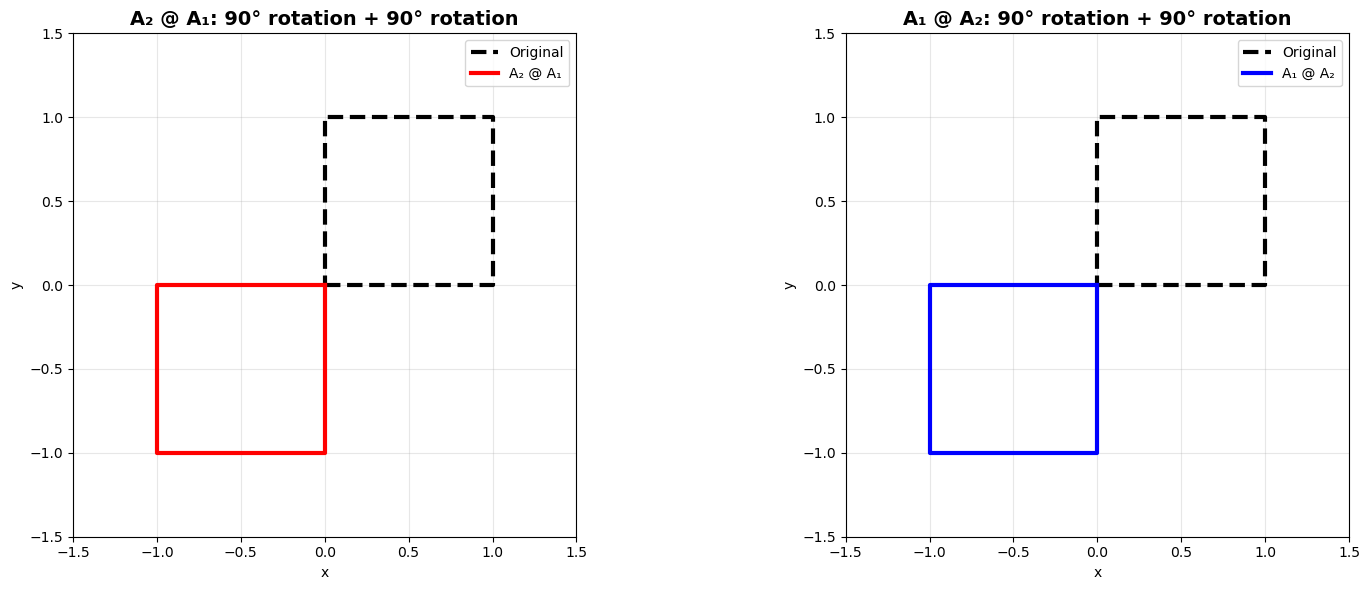

Visual proof of rotation commutativity!
• Left plot: 90° then 90° rotation
• Right plot: 90° then 90° rotation
• Both plots show IDENTICAL final positions!
• This demonstrates that rotations around the same axis commute
• Total rotation in both cases: 180° counterclockwise (point reflection)

A₂ @ A₁ = 
[[-1  0]
 [ 0 -1]]
A₁ @ A₂ = 
[[-1  0]
 [ 0 -1]]
Are they equal? True


In [9]:
# Redefine the matrices to ensure consistency
A1 = np.array([[0, -1], [1, 0]])  # 90° counterclockwise rotation
A2 = np.array([[0, -1], [1, 0]])  # 90° counterclockwise rotation

# Calculate compositions
A_total = A2 @ A1    # Should be 180° rotation
alt_total = A1 @ A2  # Should be 180° rotation

# Visual comparison of both orders - special case where they're equal!
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot A2 @ A1 (90° rotation first, then 90° rotation)
square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
A2A1_result = A_total @ square

ax1.plot(square[0], square[1], 'k--', linewidth=3, label='Original')
ax1.plot(A2A1_result[0], A2A1_result[1], 'r-', linewidth=3, label='A₂ @ A₁')
ax1.set_title('A₂ @ A₁: 90° rotation + 90° rotation', fontsize=14, fontweight='bold')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot A1 @ A2 (90° rotation first, then 90° rotation)
A1A2_result = alt_total @ square

ax2.plot(square[0], square[1], 'k--', linewidth=3, label='Original')
ax2.plot(A1A2_result[0], A1A2_result[1], 'b-', linewidth=3, label='A₁ @ A₂')
ax2.set_title('A₁ @ A₂: 90° rotation + 90° rotation', fontsize=14, fontweight='bold')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Set same limits for comparison
for ax in [ax1, ax2]:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

print("Visual proof of rotation commutativity!")
print("• Left plot: 90° then 90° rotation")
print("• Right plot: 90° then 90° rotation") 
print("• Both plots show IDENTICAL final positions!")
print("• This demonstrates that rotations around the same axis commute")
print("• Total rotation in both cases: 180° counterclockwise (point reflection)")

# Verify the matrices are correct
print(f"\nA₂ @ A₁ = \n{A_total}")
print(f"A₁ @ A₂ = \n{alt_total}")
print(f"Are they equal? {np.allclose(A_total, alt_total)}")

## ✅ Summary

| Concept                     | Explanation |
|----------------------------|-------------|
| Matrix Composition         | Combine effects of multiple transformations |
| Order matters              | A2 @ A1 ≠ A1 @ A2 in general |
| Associative                | Grouping doesn’t matter: (A3 @ A2) @ A1 = A3 @ (A2 @ A1) |

Matrix composition is the backbone of animation pipelines, neural nets, and equation solving in linear systems.

---

## ✅ Key Takeaways: Matrix Composition

| Concept | Mathematical Form | Meaning |
|---------|------------------|---------|
| **Composition** | $(A_2 A_1) \vec{v} = A_2(A_1 \vec{v})$ | Apply transformations sequentially |
| **Reading Order** | $A_2 A_1$ | Read right-to-left: $A_1$ first, then $A_2$ |
| **Non-Commutative** | $A_2 A_1 \neq A_1 A_2$ | Order matters! |
| **Associative** | $(A_3 A_2) A_1 = A_3 (A_2 A_1)$ | Grouping doesn't matter |
| **Determinant Property** | $\det(A_2 A_1) = \det(A_2) \cdot \det(A_1)$ | Areas multiply |

---

## 🌍 Real-World Applications

**Computer Graphics**: 
- 3D rotations around different axes
- Model-view-projection pipeline
- Animation keyframe interpolation

**Robotics**:
- Joint angle compositions
- End-effector positioning
- Path planning transformations

**Neural Networks**:
- Layer composition: $f_3(f_2(f_1(x)))$
- Weight matrix multiplication
- Forward propagation

**Linear Systems**:
- Gaussian elimination steps
- Change of basis transformations
- Solving $A\vec{x} = \vec{b}$ systems

---

## 🧠 Mental Model

Think of matrix composition as a **transformation assembly line**:
1. Each matrix is a "machine" that transforms shapes
2. Output of one machine becomes input to the next
3. Order of machines determines final result
4. You can't rearrange machines without changing the outcome

**Remember**: Matrix multiplication reads **right-to-left**, just like function composition!